In [276]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import math
import pandas as pd
import os

In [277]:
dataset_dir = "Tire Textures/training_data" 

data = [] 
labels = []
names = []
for sub_folder in os.listdir(dataset_dir):
    sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img = cv2.imread(os.path.join(dataset_dir, sub_folder, filename))
        # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # re = resizeIMG(img)
        data.append(img)
        labels.append(sub_folder)
        names.append(filename)

data = np.array(data)
labels = np.array(labels)
names = np.array(names)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19980/3161257174.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [278]:
# lenght = 200

In [279]:
GRAY=[]
for i in range(len(data)):
# for i in range(lenght):
    GRAY.append(cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY))

In [280]:
resizeData=[]
for i in range(len(data)):
# for i in range(lenght):
    resizeData.append(cv2.resize(GRAY[i],(300,300),interpolation=cv2.INTER_AREA))
    

In [281]:
bilateral=[]
for i in range(len(data)):
# for i in range(lenght):
    bilateral.append(cv2.bilateralFilter(resizeData[i],15,80,80))

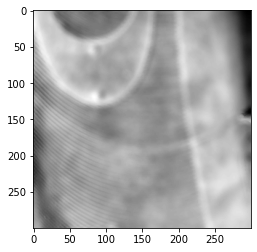

In [282]:
plt.imshow(bilateral[100],cmap="gray")

In [283]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

In [284]:
closing=[]
for i in range(len(data)):
# for i in range(lenght):
    closing.append(cv2.morphologyEx(bilateral[i], cv2.MORPH_CLOSE, kernel))

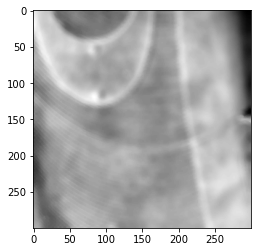

In [285]:
plt.imshow(closing[100],cmap="gray")

In [286]:
#Kernel Operator Sobel
Sx_sob = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]
               ])#Membuat kernel untuk operator  sobel pada sumbu x

Sy_sob = np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]
                ])#Membuat kernel untuk operator  sobel pada sumbu y

In [287]:
def sobel(matriks, kernel):#Membuat fungsi untuk melakukan konvolusi terhadap matriks citra untuk operator sobel dengan parameter matriks dan kernel
    arr_tam = np.zeros(matriks.shape)#Membuat matriks dengan nilai 0 seukuran dengan matriks dari citra
    for i in range(matriks.shape[0]-1):#Melakukan perulangan untuk matriks baris
        for j in range(matriks.shape[1]-1):#Melakukan perulangan untuk kolom
            x_kernel = 0 #Menetapkan nilai dari x_kernel = 0
            for k in range(i-1, i+2):#Melakukan perulangan untuk baris kernel
                y_kernel = 0#Menetapkan nilai dari x_kernel = 0
                for l in range(j-1, j+2):#Melakukan perulangan untuk kolom kernel
                    arr_tam[i][j] += matriks[k][l] * kernel[x_kernel][y_kernel]#Melakukan operasi konvolusi
                    y_kernel+=1
                x_kernel+=1
    return arr_tam

In [288]:
sobelX=[]
for i in range(len(data)):
# for i in range(lenght):
    sobelX.append(sobel(closing[i],Sx_sob))

In [289]:
sobelY=[]
for i in range(len(data)):
# for i in range(lenght):
    sobelY.append(sobel(closing[i],Sy_sob))

In [290]:
sobelDET=[]
for i in range(len(data)):
# for i in range(lenght):
    sobelDET.append((abs(sobelX[i])+ abs(sobelY[i])).astype('uint8'))

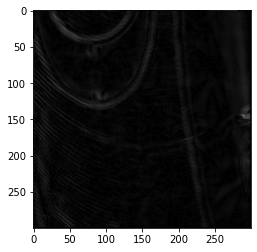

In [291]:
plt.imshow(sobelDET[100],cmap="gray")

In [292]:
# # Sobel Edge Detection
# sobelx = cv2.Sobel(src=closing, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
# sobely = cv2.Sobel(src=closing, ddepth=cv2.CV_8U, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axi
# Sobel = abs(sobelx) + abs(sobely)

In [293]:
# ret,th1 = cv2.threshold(sobelDet,0,255,cv2.THRESH_BINARY)

In [294]:
Threshold=[]
for i in range(len(data)):
# for i in range(lenght):
    Threshold.append(cv2.adaptiveThreshold(sobelDET[i],255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2))

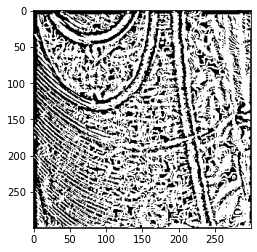

In [295]:
plt.imshow(Threshold[100],cmap="gray")

In [296]:
kernel = np.ones((5,5),np.uint8)

In [297]:
closing=[]
for i in range(len(data)):
    closing.append(cv2.morphologyEx(Threshold[i], cv2.MORPH_CLOSE, kernel))

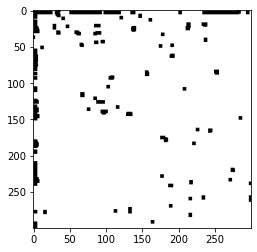

In [298]:
plt.imshow(closing[100],cmap="gray")

In [299]:
erosi=[]
for i in range(len(data)):
    erosi.append(cv2.erode(closing[i], kernel))

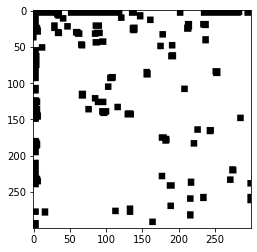

In [300]:
plt.imshow(erosi[100],cmap="gray")

In [301]:
def derajat0 (img): 
    max = np.max(img)
    imgTmp=np.zeros([max+1,max+1])
    for i in range (len(img)):
        for j in range (len(img[i])-1):
            imgTmp[img[i,j],img[i,j+1]] += 1
            
    data= imgTmp+np.transpose(imgTmp)
    tmp=np.sum(data)
            
    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    return data

In [302]:
def derajat45 (img):
    max = np.max(img)
    imgTmp=np.zeros([max+1,max+1])
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i+1,j],img[i,j+1]] += 1
            
    data= imgTmp+np.transpose(imgTmp)
    tmp=np.sum(data)
    
    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    return data

In [303]:
def derajat90 (img):
    max = np.max(img)
    imgTmp=np.zeros([max+1,max+1])
    for i in range (len (img)-1):
        for j in range (len (img[i])):
            imgTmp[img[i+1,j],img[i,j]] += 1
            
    data= imgTmp+np.transpose(imgTmp)
    tmp=np.sum(data)
            
    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    return data

In [304]:
def derajat135 (img):
    max = np.max(img)
    imgTmp=np.zeros([max+1,max+1])
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i,j],img[i+1,j+1]] += 1
            
    data= imgTmp+np.transpose(imgTmp)
    tmp=np.sum(data)
            
    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    return data

In [305]:
def contrast(data): # membuat fungsi fitur contrast
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= data[i,j]+pow(i-j,2)
    return simpan

In [306]:
def dissimilarity(data): # membuat fungsi fitur dissimilarity
    simpan = 0
    for i in range (len(data)): 
        for j in range(len(data)):
            simpan+= data[i,j]+abs(i-j)
    return simpan

In [307]:
def homogenitas(data): # membuat fungsi fitur homogenitas
    simpan = 0 
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=data[i,j]/(1+abs(i-j))
    return simpan

In [308]:
def entropi(data): # membuat fungsi fitur entropi
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                simpan+= -(data[i,j] * math.log(data[i,j]))
    return simpan

In [309]:
def ASM(data): # membuat fungsi fitur ASM
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow(data[i,j],2)
    return simpan 

In [310]:
def energy(data): # membuat fungsi fitur energy
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=pow(data[i,j],2)
    return simpan

In [311]:
def correlation(data,mI,mJ,tI,tJ): # membuat fungsi fitur correlation
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=((i-mI)*(j-mJ)*data[i,j])/(tI*tJ)
    return simpan

In [312]:
def meanI(data): # membuat fungsi mean 
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= i * data[i,j]
    return simpan

def meanJ(data): # membuat fungsi mean
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= j * data[i,j]
    return simpan  

In [313]:
def taoI(data,mI): # membuat fungsi tao
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((i-mI),2)*data[i,j]
    simpan = math.sqrt(simpan)
    return simpan
def taoJ(data,mJ): # membuat fungsi tao
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((j-mJ),2)*data[i,j]
    simpan = math.sqrt(simpan)
    return simpan

In [314]:
hasil = []
for i in range(len(data)):
    dat = []
    dat.append(derajat0 (Threshold[i]))
    dat.append(derajat45 (Threshold[i]))
    dat.append(derajat90 (Threshold[i]))
    dat.append(derajat135 (Threshold[i]))
    hasil.append(dat)

In [315]:
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
           ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
           ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
           ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']

In [316]:
def save_frame(result):
    frame = []
    indeks = 0
    for i in hasil:
        save = []
        save.append(names[indeks])
        indeks+=1
        for j in i:
            en = energy(j)
            save.append(en)
            
            hm = homogenitas(j)
            save.append(hm)
            
            ent = entropi(j)
            save.append(ent)
            
            con = contrast(j)
            save.append(con)

            dis = dissimilarity(j)
            save.append(dis)

            asm = ASM(j)
            save.append(asm)
            mI = meanI(j)
            mJ = meanJ(j)
            tI = taoI(j,mI)
            tJ = taoJ(j,mJ)

            cor = correlation(j,mI,mJ,tI,tJ)
            save.append(cor)
        frame.append(save)
    return frame    

In [317]:
frame = save_frame(hasil)
df = pd.DataFrame(frame, columns=headerPass)

In [318]:
df

,path,energi0,homogenitas0,entropy0,contras0,dissimilarity0,ASM0,correlation0,energi45,homogenitas45,...,dissimilarity90,ASM90,correlation90,energi135,homogenitas135,entropy135,contras135,dissimilarity135,ASM135,correlation135
0,Cracked-119.jpg,0.405914,0.792419,1.111705,715816961.0,5592321.0,0.405914,0.514367,0.366803,0.714857,...,5592321.0,0.422003,0.572257,0.375562,0.734356,1.171282,715816961.0,5592321.0,0.375562,0.378170
1,Cracked-120.jpg,0.398990,0.802969,1.116285,715816961.0,5592321.0,0.398990,0.552817,0.363706,0.737219,...,5592321.0,0.402630,0.562846,0.354704,0.717387,1.205350,715816961.0,5592321.0,0.354704,0.358200
2,Cracked-125.jpg,0.354193,0.807833,1.171254,715816961.0,5592321.0,0.354193,0.606368,0.297132,0.694590,...,5592321.0,0.329434,0.519229,0.300994,0.704284,1.287405,715816961.0,5592321.0,0.300994,0.394459
3,Cracked-138.jpg,0.363256,0.810764,1.157987,715816961.0,5592321.0,0.363256,0.606555,0.302775,0.690490,...,5592321.0,0.337013,0.513134,0.312273,0.714011,1.268642,715816961.0,5592321.0,0.312273,0.405628
4,Cracked-153.jpg,0.327931,0.779838,1.221216,715816961.0,5592321.0,0.327931,0.557856,0.276141,0.662658,...,5592321.0,0.294693,0.422197,0.268877,0.638402,1.348105,715816961.0,5592321.0,0.268877,0.273805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Normal (390).jpg,0.383032,0.796395,1.140744,715816961.0,5592321.0,0.383032,0.550114,0.346940,0.726790,...,5592321.0,0.372751,0.509945,0.332411,0.692039,1.242680,715816961.0,5592321.0,0.332411,0.319020
182,Normal (396).jpg,0.365116,0.811786,1.154988,715816961.0,5592321.0,0.365116,0.607686,0.326563,0.741865,...,5592321.0,0.355925,0.576023,0.320498,0.728974,1.252676,715816961.0,5592321.0,0.320498,0.434850
183,Normal (397).jpg,0.362704,0.795895,1.167598,715816961.0,5592321.0,0.362704,0.568054,0.331495,0.737041,...,5592321.0,0.396818,0.678926,0.338198,0.750779,1.220748,715816961.0,5592321.0,0.338198,0.472380
184,Normal (398).jpg,0.381017,0.821436,1.128636,715816961.0,5592321.0,0.381017,0.620086,0.324947,0.717175,...,5592321.0,0.352495,0.518741,0.327271,0.722456,1.244876,715816961.0,5592321.0,0.327271,0.409343


In [319]:
df.to_csv(r'Kelompok2.csv', index=False)

In [320]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns

In [321]:
df = pd.read_csv('Kelompok2.csv')

In [322]:
df.head(5)

,path,energi0,homogenitas0,entropy0,contras0,dissimilarity0,ASM0,correlation0,energi45,homogenitas45,...,dissimilarity90,ASM90,correlation90,energi135,homogenitas135,entropy135,contras135,dissimilarity135,ASM135,correlation135
0,Cracked-119.jpg,0.405914,0.792419,1.111705,715816961.0,5592321.0,0.405914,0.514367,0.366803,0.714857,...,5592321.0,0.422003,0.572257,0.375562,0.734356,1.171282,715816961.0,5592321.0,0.375562,0.378170
1,Cracked-120.jpg,0.398990,0.802969,1.116285,715816961.0,5592321.0,0.398990,0.552817,0.363706,0.737219,...,5592321.0,0.402630,0.562846,0.354704,0.717387,1.205350,715816961.0,5592321.0,0.354704,0.358200
2,Cracked-125.jpg,0.354193,0.807833,1.171254,715816961.0,5592321.0,0.354193,0.606368,0.297132,0.694590,...,5592321.0,0.329434,0.519229,0.300994,0.704284,1.287405,715816961.0,5592321.0,0.300994,0.394459
3,Cracked-138.jpg,0.363256,0.810764,1.157987,715816961.0,5592321.0,0.363256,0.606555,0.302775,0.690490,...,5592321.0,0.337013,0.513134,0.312273,0.714011,1.268642,715816961.0,5592321.0,0.312273,0.405628
4,Cracked-153.jpg,0.327931,0.779838,1.221216,715816961.0,5592321.0,0.327931,0.557856,0.276141,0.662658,...,5592321.0,0.294693,0.422197,0.268877,0.638402,1.348105,715816961.0,5592321.0,0.268877,0.273805


In [432]:
df = df.fillna(0)
df['labels'] = labels

In [433]:
y = df['labels']
X = df.drop(['labels', 'path'], axis = 1)

In [434]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [435]:
#apply PCA
pca = PCA(n_components=4)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25)

In [437]:
model = svm.SVC()

In [438]:
np.unique(y)

array(['cracked', 'normal'], dtype=object)

In [439]:
model.fit(X_train, y_train)
# predicting the response for test dataset
y_pred = model.predict(X_test)

In [440]:
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100),'%')

Accuracy: 87 %
